In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time

Generate data based on a linear equation ($y = 2x + 5$) distorted with noise.

<function matplotlib.pyplot.show(close=None, block=None)>

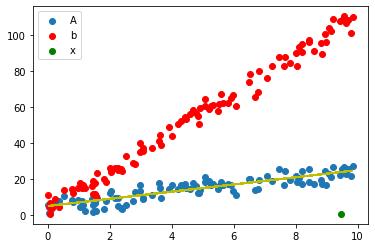

In [2]:
def lin():
    """
    Where A is an array of inputs for 'x'
    """
    li = [0]*100
    Y = [0]*100
    O = [0]*100
    for i in range(100):
        li[i] = random.random()*10
        y = 2*li[i] + 5
        Y[i] = y + np.random.normal(0,3) #adding noise
        O[i] = [li[i],Y[i]]
    return O

A = lin()

xVec = np.random.rand(2)*10
temp = np.matmul(A,xVec)
b = temp + np.random.normal(0,3,temp.shape)

def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,X)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(np.array(a).transpose(),(np.matmul(a,X)-B))

def GD(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

aaa = [0]*100
bbb = [0]*100
ccc = [0]*100
for i in range(100):
    aaa[i] = A[i][0]
    bbb[i] = A[i][1]
    ccc[i] = 2*A[i][0] + 5
plt.scatter(aaa, bbb, label = 'A')
plt.scatter(aaa, b, c = 'r', label = 'b')
plt.scatter(xVec[0], xVec[1], c = 'g', label = 'x')
plt.plot(aaa, ccc, 'y')
plt.legend(loc = 'best')
plt.show

In [11]:
5 < np.inf

True

In [3]:
f(random.random())

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [6]:
xVec

array([9.45647338, 0.6697053 ])

In [8]:
f_grad(xVec+random.random())

array([ 5934.73459434, 16917.95524937])

In [10]:
f(xVec + random.random())

22437.27954601721

## Nesterov Accelerated

In [3]:
A

[[3.282622737215899, 8.23469151451107],
 [3.4115799361494714, 13.804839452827867],
 [3.8820071038244173, 11.907157917883959],
 [5.813826583081654, 16.85472257720058],
 [7.9165710025697775, 22.054562725961553],
 [8.19828787011838, 18.20750064001766],
 [8.879324440210237, 22.253157434919284],
 [5.8868630462450335, 21.435493050792346],
 [3.647150494754375, 10.451954234631113],
 [8.127427488443132, 18.74312575517107],
 [4.494688730265213, 9.12847119536508],
 [0.8231220797856109, 6.993181903431477],
 [2.0746525031461447, 6.813856325267871],
 [5.262812344574471, 16.27550630830406],
 [6.236551387946907, 17.187191829632383],
 [2.415413134617527, 2.3692533915525438],
 [9.740070482448616, 29.0707152915398],
 [1.9554546583220445, 8.251056440302932],
 [4.614276004589532, 15.7573762131423],
 [8.936568997376538, 24.833123036231278],
 [3.4485799295639508, 12.714351656213264],
 [1.2729077765993213, 7.021524442565476],
 [0.7446552730746836, 0.8558260129857569],
 [0.296353975390381, 6.521342949367354],


In [4]:
len(A)

100

In [11]:
lam0 = 0
lam1 = 0.5*(1 + np.sqrt( 1 + 4*lam0**2))
lam2 = 0.5*(1 + np.sqrt( 1 + 4*lam1**2) )           
gam1 = (1 * lam1)/lam2

In [12]:
lam1

1.0

In [13]:
lam2

1.618033988749895

## Barzilai-Borwein

In [57]:
def Lam_func(x2, x1, f_grad):
    return np.dot(x2 - x1, f_grad(x2) - f_grad(x1))/np.linalg.norm(f_grad(x2) - f_grad(x1))**2

----------------------


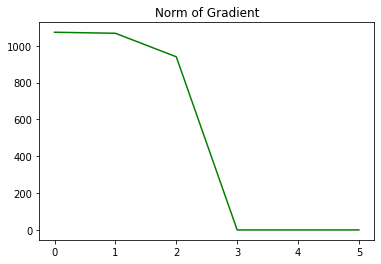

[5.4088674  4.83268915]
[-0.00010697 -0.00031364]
Iterations: 7
Time taken: 0.14020109176635742
Lambda:  0.001953125


In [97]:
current = time.time()
X =[]
lam = random.random()
# print('lambda initial: ',lam)
Lambd = [lam]
# theta = 100000
# print('theta intial:', theta)
x = xVec
# print('x intial:', x)
x1 = GD(x,lam,f_grad)
# print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-6:
    lam_prev = lam
#     min1 = np.sqrt(1 + theta)*lam
#     min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
#     print('min1:', min1)
#     print('min2:', min2)
    lam = Lam_func(x1, x, f_grad)
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = x1
    x1 = GD(x1, lam, f_grad)
#     print('x1:', x1)
    x = temp
#     print('x:', x)
#     theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
#     print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(len(gr2)), gr2, c='g')
plt.title(label = 'Norm of Gradient')
plt.show()
print(x)
print(f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

\begin{align}
\text{min } \mathbf{x}: \\
f(\mathbf{x}) &= \frac{1}{2} \|A \mathbf{x} - b \|^2\\
\nabla f(\mathbf{\mathbf{x}}) &= A^T(A \mathbf{x} -b)\\
{\mathbf{x}}_{k+1} &= \mathbf{x}_k - \lambda_k \nabla f(\mathbf{x}_k)
\end{align}


## Backtracking Line Search

In [94]:
def Line(x,f,f_grad):
    alph_prime = 1
    rho = 0.5
    c = 0.1
    alph = alph_prime
    while f(x - alph*f_grad(x)) > f(x) - c*alph*np.linalg.norm(f_grad(x))**2:
#         print('LHS: ', f(x - alph*f_grad(x)))
#         print('RHS: ', f(x) - c*alph*np.linalg.norm(f_grad(x))**2)
        ### is norm the right move here?
        alph = rho*alph
#         print('Alpha:', alph)
    return alph

In [103]:

current = time.time()
X = []
# L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
# lamb = 1/L
x = xVec
lamb = Line(x,f,f_grad)
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-6:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
    lamb = Line(x,f,f_grad)
#     print('x= ', x)
#     print('lambda', lamb)
print('----------------------')
plt.plot(range(10), gr2[:10], c='g')
plt.title(label = 'Norm of Gradient: [0,10]')
plt.show()
plt.plot(range(11,50), gr2[11:50], c='g')
plt.title(label = 'Norm of Gradient: [11,50]')
plt.show()
plt.plot(range(51,100), gr2[51:100], c='g')
plt.title(label = 'Norm of Gradient: [51,100]')
plt.show()
plt.plot(range(101,len(gr2)), gr2[101:len(gr2)], c='g')
plt.title(label = 'Norm of Gradient: [101,600]')
plt.show()
print('X:', x)
print('Gradient:', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

KeyboardInterrupt: 

### Vanilla Gradient Descent

In [3]:
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])

In [4]:
L

30157.942044368385

----------------------


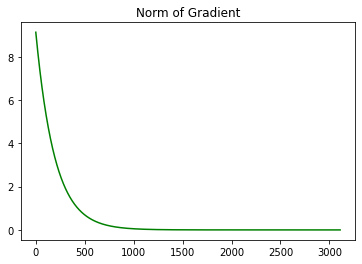

X: [5.40886741 4.83268916]
Gradient: [ 9.45146322e-07 -3.22357984e-07]
Iterations: 3112
Time taken: 2.4273183345794678
Lambda:  3.0702222272352486e-05


In [99]:
current = time.time()
X = []
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
lamb = 1/L
x = xVec
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-6:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.title(label = 'Norm of Gradient')
plt.show()
print('X:', x)
print('Gradient:', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

Adaptive Gradient Descent

----------------------


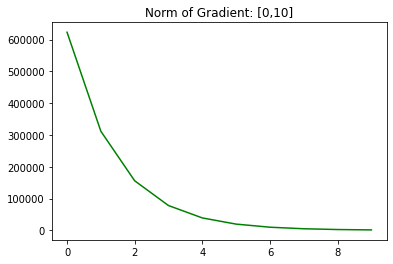

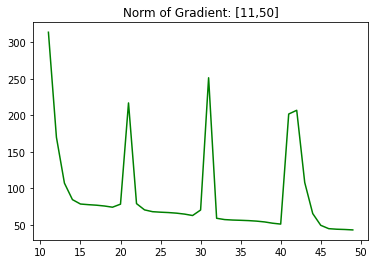

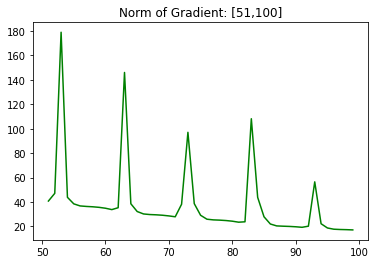

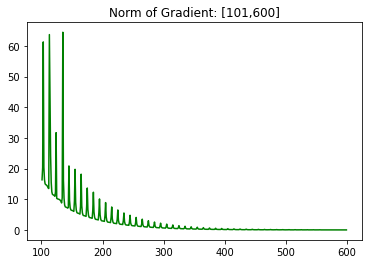

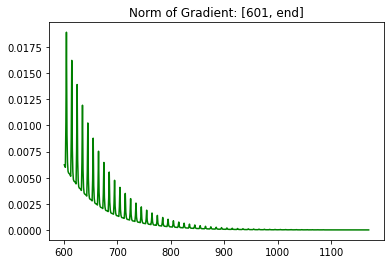

x value [5.4088674  4.83268916]
Gradient [-9.39085691e-07  3.28593963e-07]
Iterations: 1172
Time taken: 2.0348708629608154
Lambda:  [0.05901447154432504, 1.535264589699797e-05, 1.5351111168974646e-05, 2.316722190195769e-05, 9.4556169538747e-05, 0.0001163983036789627, 2.852003642953125e-05, 1.8329873781584407e-05, 0.00018819252026508056, 4.493796745674464e-05, 1.605006914503182e-05, 0.00030442825345794065]


In [100]:
current = time.time()
X =[]
lam = random.random()
# print('lambda initial: ',lam)
Lambd = [lam]
theta = 100000
# print('theta intial:', theta)
x = xVec
# print('x intial:', x)
x1 = GD(x,lam,f_grad)
# print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-6:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
#     print('min1:', min1)
#     print('min2:', min2)
    lam = np.min([min1, min2])
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = x1
    x1 = GD(x1, lam, f_grad)
#     print('x1:', x1)
    x = temp
#     print('x:', x)
    theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
#     print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(10), gr2[:10], c='g')
plt.title(label = 'Norm of Gradient: [0,10]')
plt.show()
plt.plot(range(11,50), gr2[11:50], c='g')
plt.title(label = 'Norm of Gradient: [11,50]')
plt.show()
plt.plot(range(51,100), gr2[51:100], c='g')
plt.title(label = 'Norm of Gradient: [51,100]')
plt.show()
plt.plot(range(101,600), gr2[101:600], c='g')
plt.title(label = 'Norm of Gradient: [101,600]')
plt.show()
plt.plot(range(601,len(gr2)), gr2[601:], c='g')
plt.title(label = 'Norm of Gradient: [601, end]')
plt.show()

print('x value', x1)
print('Gradient', f_grad(x1))
print('Iterations:', count)
print('Time taken:', time.time() - current)
La = [Lambd[0], Lambd[1]]
for i in range(2,len(Lambd), int(np.floor(len(Lambd)/10))):
    La.append(Lambd[i])
print('Lambda: ', La)

Generating data

In [ ]:
k = 5
for i in range(100):
    globals()['x'+str(i)] = k
    k = k*2

In [ ]:
for i in range(10):
    globals()['X'+str(i)] = [0]*10
for j in range(10):
    globals()['X'+str(0)][j] = (random.random()+1e-12)*10
    y = 2*globals()['X'+str(0)][j] + 5
    noiz = 3
    for k in range(10):
        globals()['X'+str(k)][j] = y + np.random.normal(0,noiz)
        noiz += 3
A = [globals()['X'+str(i)] for i in range(10)]

In [ ]:
def linFunc(x):
    return 2*x + 5

In [ ]:
def generate(function, dim, vec_len, scale):
    """
    Where A is an array of inputs for 'x'
    """
    for i in range(dim):
        globals()['X'+str(i)] = [0]*vec_len
    for j in range(vec_len):
        globals()['X'+str(0)][j] = (random.random()+1e-12)*scale
        y = function(globals()['X'+str(0)][j])
        noiz = 3
        for k in range(dim):
            globals()['X'+str(k)][j] = y + np.random.normal(0,noiz)
            noiz += 3
    A = [globals()['X'+str(i)] for i in range(dim)]
    return(A)